In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]

In [5]:
dado

,product,state,country,type,route,tons,usd
date,,,,,,,
1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0
...,...,...,...,...,...,...,...
2019-12-01,wheat,SP,Argentina,Import,Sea,87124.765,17897516.0
2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0
2019-12-01,wheat,SP,Lebanon,Import,Sea,5.769,6726.0


In [6]:
dado = dado.groupby([dado.index.year,dado.index.month,dado.type]).sum()
dado

tons           usd
date date type                              
1997 1    Export  8.761120e+05  2.331443e+08
          Import  3.282403e+04  1.049101e+07
     2    Export  3.529002e+05  9.216065e+07
          Import  1.392166e+05  3.339882e+07
     3    Export  1.259791e+06  3.459843e+08
...                        ...           ...
2019 10   Import  8.365370e+05  1.747572e+08
     11   Export  1.162234e+07  3.305878e+09
          Import  6.691049e+05  1.255010e+08
     12   Export  1.000026e+07  2.736503e+09
          Import  8.688291e+05  1.683486e+08

[552 rows x 2 columns]

In [7]:
idx = dado.index
export = dado[idx.get_level_values(2)=="Export"]
import_ = dado[idx.get_level_values(2)=="Import"]

In [57]:
import_

tons          usd
date date type                           
1997 1    Import   32824.025   10491007.0
     2    Import  139216.628   33398824.0
     3    Import   84204.818   18617608.0
     4    Import  242961.851   53742417.0
     5    Import  106990.371   25483083.0
...                      ...          ...
2019 8    Import  625115.023  132394689.0
     9    Import  651612.997  137236517.0
     10   Import  836537.022  174757192.0
     11   Import  669104.879  125500972.0
     12   Import  868829.066  168348632.0

[276 rows x 2 columns]

In [53]:
list(import_.iterrows())[0]

((1997, 1, 'Import'),
 tons    3.282403e+04
 usd     1.049101e+07
 Name: (1997, 1, Import), dtype: float64)

In [14]:
inputs=[]
for i in import_.iterrows():
    indices, valores = i
    a, b = indices[:2]
    c, d = valores
    inputs.append([a,b,c,d])
targets=[]
for i in export.iterrows():
    indices, valores = i
    a, b = indices[:2]
    c, d = valores
    targets.append([a,b,c,d])

In [15]:
targets = np.array(targets)
inputs = np.array(inputs)

In [16]:
targets.shape

(276, 4)

In [65]:
X=[]
y=[]
for i in range(12,len(targets)-1):
    
    X.append( targets[i-12,:] )
    y.append( targets[i,-1] )
X = np.array(X)
y = np.array(y)

In [69]:
sh = X.shape
sh2 = y.shape

In [70]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler((0,1))
X_norm = scaler.fit_transform(np.array(X).flatten().reshape(-1,1)).reshape(sh)

In [72]:
y_norm = scaler.fit_transform(y.reshape(-1,1))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.33, random_state=42, shuffle=True)

In [91]:
clf = tree.DecisionTreeRegressor(max_depth=50, max_features=4)

In [92]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [93]:
pred = clf.predict(X_test)

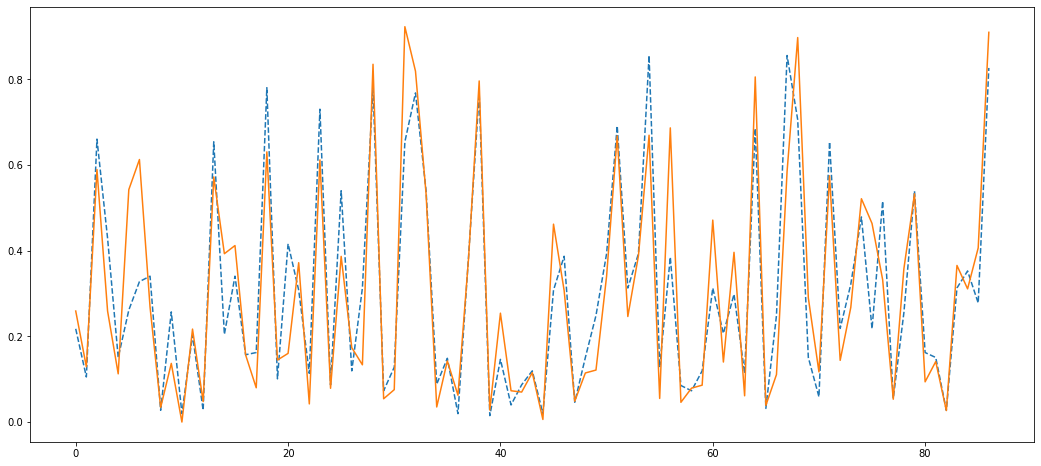

In [94]:
plt.plot(pred,'--')
plt.plot(y_test)

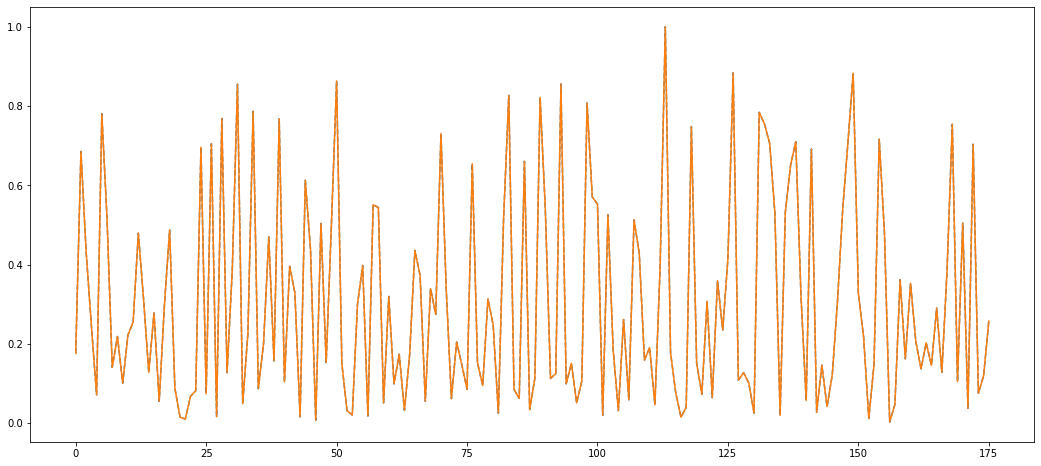

In [95]:
plt.plot(clf.predict(X_train),'--')
plt.plot(y_train)

In [96]:
mean_absolute_error( y_test, pred )

0.08191490189361329

In [97]:
mean_squared_log_error( y_test, pred )

0.006305639496707661

In [98]:
mean_squared_error( y_test, pred )

0.012589809316441445